In [2]:
import os 
import json
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from causalimpact import CausalImpact

WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install m2w64-toolchain`
WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


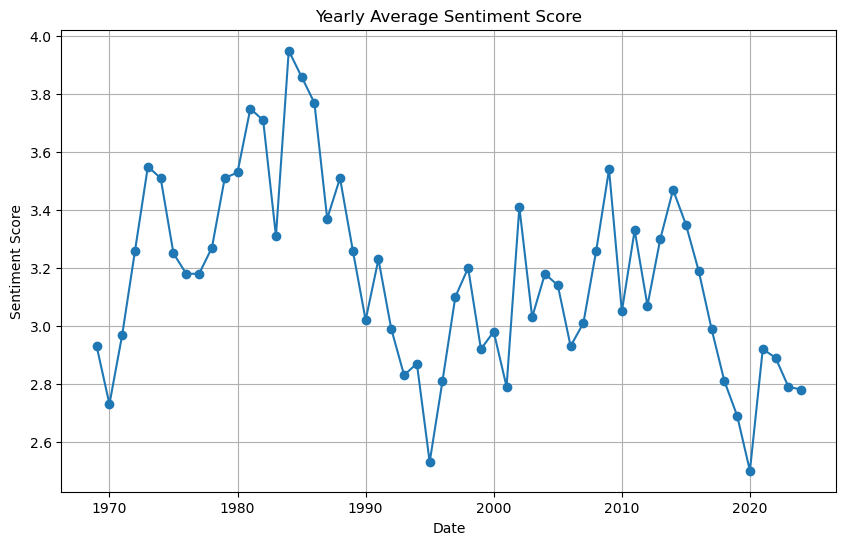

In [90]:
# 读取数据
with open('yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 将数据转换为DataFrame
df = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# 画出折线图
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['sentiment_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Yearly Average Sentiment Score')
plt.grid(True)
plt.show()


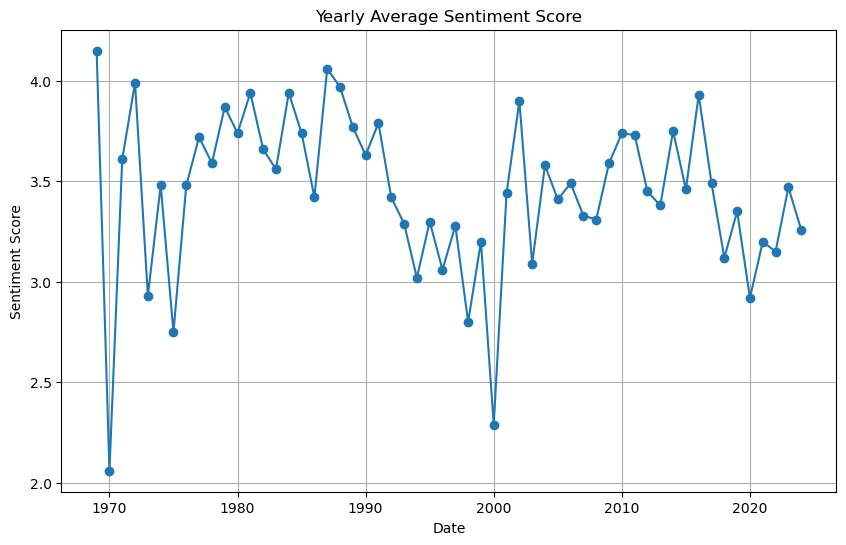

In [91]:
# canada
with open('canada_yearly_average_sentiment.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

# 将数据转换为DataFrame
df2 = pd.DataFrame(list(data.items()), columns=['date', 'sentiment_score'])
df2['date'] = pd.to_datetime(df2['date'])
df2.set_index('date', inplace=True)

# 画出折线图
plt.figure(figsize=(10, 6))
plt.plot(df2.index, df2['sentiment_score'], marker='o', linestyle='-')
plt.xlabel('Date')
plt.ylabel('Sentiment Score')
plt.title('Yearly Average Sentiment Score')
plt.grid(True)
plt.show()

In [134]:
date_range = pd.date_range(start="1969", periods=len(df), freq='Y')
data = df['sentiment_score'].values
data_frame= pd.DataFrame(data, columns=['us-china'])
data2 = df2['sentiment_score'].values
data_frame['us-canada'] = data2
data_frame.index = date_range
data_frame.tail(10)

,us-china,us-canada
2015-12-31,3.35,3.46
2016-12-31,3.19,3.93
2017-12-31,2.99,3.49
2018-12-31,2.81,3.12
2019-12-31,2.69,3.35
2020-12-31,2.50,2.92
2021-12-31,2.92,3.20
2022-12-31,2.89,3.15
2023-12-31,2.79,3.47
2024-12-31,2.78,3.26


In [135]:
# 设置因果影响分析的时间段
pre_period = [pd.to_datetime('1969-12-31'), pd.to_datetime('2014-12-31')]
post_period = [pd.to_datetime('2015-12-31'), pd.to_datetime('2024-12-31')]

# 进行因果影响分析
impact = CausalImpact(data_frame, pre_period, post_period)
impact.run()

c:\anaconda\lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['alpha']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [136]:
impact.inferences.tail(20)

,response,cum_response,point_pred,point_pred_lower,point_pred_upper,cum_pred,cum_pred_lower,cum_pred_upper,point_effect,point_effect_lower,point_effect_upper,cum_effect,cum_effect_lower,cum_effect_upper
2005-12-31,3.14,119.39,3.140411,2.669858,3.610963,119.280786,-507.522022,746.083595,-0.000411,0.470142,-0.470963,0.000000,0.000000,0.000000
2006-12-31,2.93,122.32,3.149251,2.678699,3.619803,122.430037,-504.843323,749.703398,-0.219251,0.251301,-0.689803,0.000000,0.000000,0.000000
2007-12-31,3.01,125.33,2.998433,2.527881,3.468985,125.428470,-502.315443,753.172383,0.011567,0.482119,-0.458985,0.000000,0.000000,0.000000
2008-12-31,3.26,128.59,3.003158,2.532606,3.473711,128.431628,-499.782837,756.646093,0.256842,0.727394,-0.213711,0.000000,0.000000,0.000000
2009-12-31,3.54,132.13,3.190351,2.719799,3.660903,131.621979,-497.063038,760.306996,0.349649,0.820201,-0.120903,0.000000,0.000000,0.000000
2010-12-31,3.05,135.18,3.418920,2.948368,3.889473,135.040900,-494.114670,764.196469,-0.368920,0.101632,-0.839473,0.000000,0.000000,0.000000
2011-12-31,3.33,138.51,3.194597,2.724045,3.665150,138.235497,-491.390624,767.861618,0.135403,0.605955,-0.335150,0.000000,0.000000,0.000000
2012-12-31,3.07,141.58,3.244702,2.774150,3.715254,141.480199,-488.616475,771.576873,-0.174702,0.295850,-0.645254,0.000000,0.000000,0.000000
2013-12-31,3.30,144.88,3.131059,2.660507,3.601612,144.611259,-485.955967,775.178484,0.168941,0.639493,-0.301612,0.000000,0.000000,0.000000
2014-12-31,3.47,148.35,3.275299,2.804747,3.745851,147.886557,-483.151221,778.924335,0.194701,0.665253,-0.275851,0.000000,0.000000,0.000000


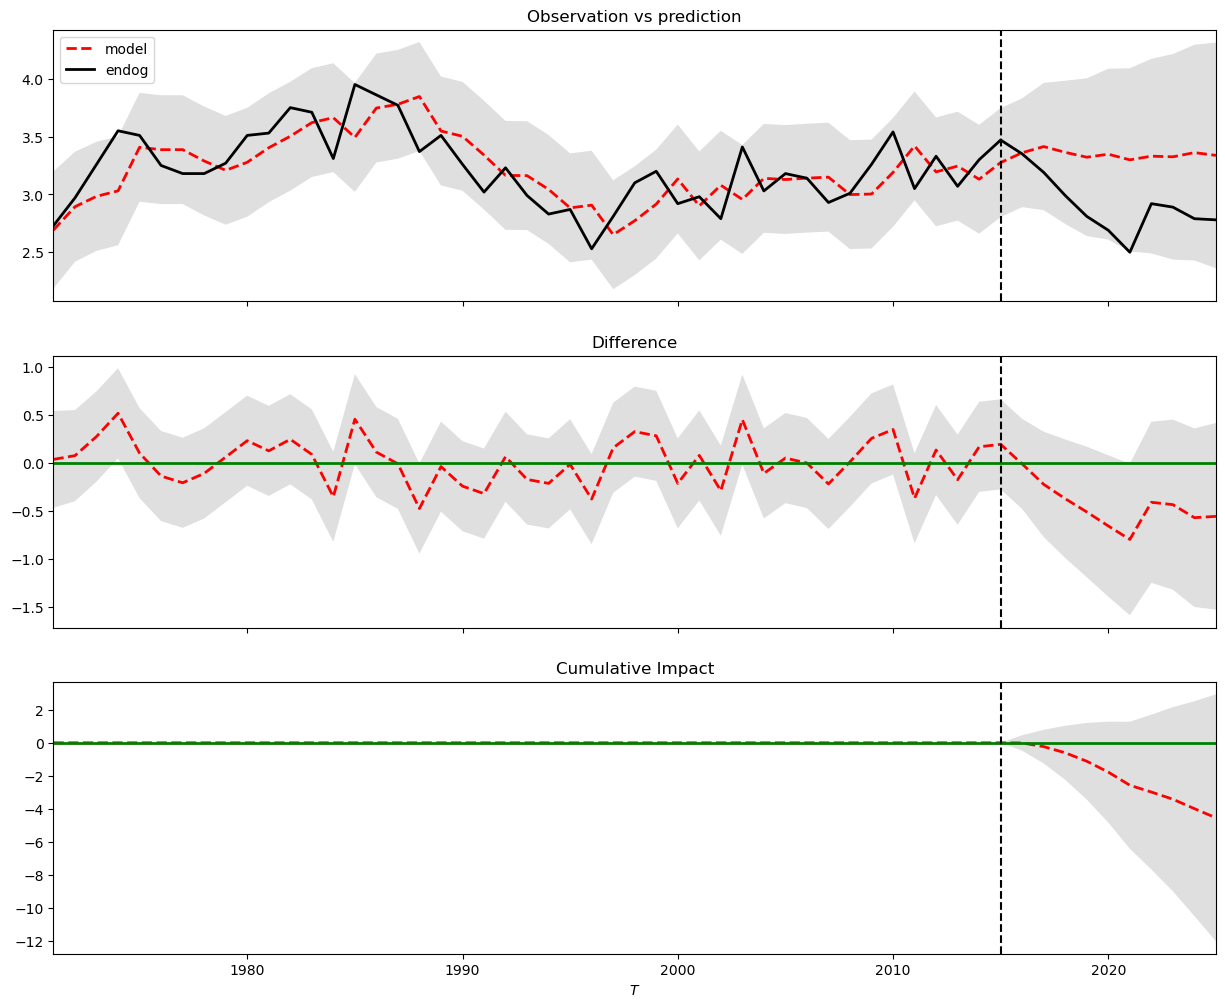

In [137]:
# # 画出因果影响分析结果
impact.plot()

In [109]:
impact.summary()

                                Average       Cumulative
Actual                                3              102
Predicted                             3              102
95% CI                           [1, 4]        [45, 160]
                                                        
Absolute Effect                       0                0
95% CI                          [1, -1]        [57, -57]
                                                        
Relative Effect                    0.1%             0.1%
95% CI                  [56.1%, -55.9%]  [56.1%, -55.9%]
                                                        
P-value                            0.0%                 
Prob. of Causal Effect           100.0%                 
